In [48]:
#import all required libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [49]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='latin-1')

In [50]:
df.head() #top 5 records

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning..

In [51]:
df.shape   # rows=11251 and coln=15

(11251, 15)

In [52]:
df.info() #Info.. about dataset..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [53]:
#lets remove unwanted coln...
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [54]:
#lets check our coln again..
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [55]:
#I want all columns names in lower case so i will use here lower().
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")  #replace spaces between columns_names with ( "_" ) like - 'Age Group'

In [56]:
df.isnull().sum()  #checking null values

user_id              0
cust_name            0
product_id           0
gender               0
age_group            0
age                  0
marital_status       0
state                0
zone                 0
occupation           0
product_category     0
orders               0
amount              12
dtype: int64

In [57]:
#Lets drop null values from our dataset..
df.dropna(inplace=True)

In [58]:
#df.isnull().sum()
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [59]:
#Change data type..
df["amount"]=df["amount"].astype(int)

In [60]:
df["amount"].dtypes

dtype('int32')

In [61]:
#Describe our specific coln
df[["age","orders","amount"]].describe()

,age,orders,amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratary Data Analysis...

In [62]:
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


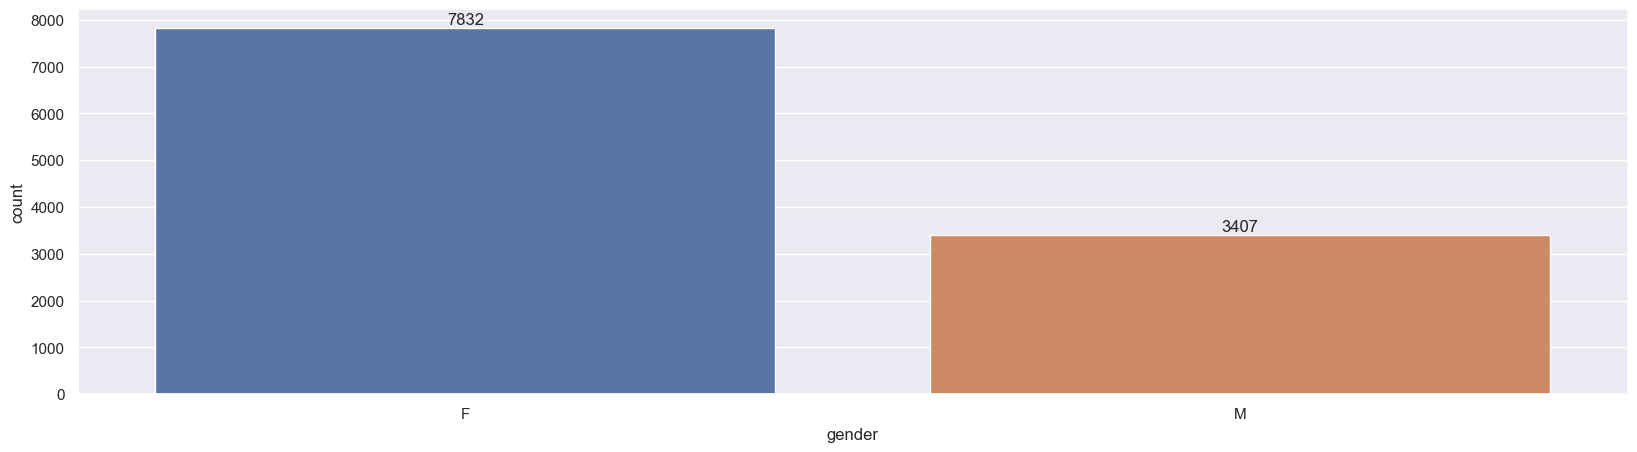

In [63]:
#Gender counts in the form of visulization...
ax=sns.countplot(x="gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='gender', ylabel='amount'>

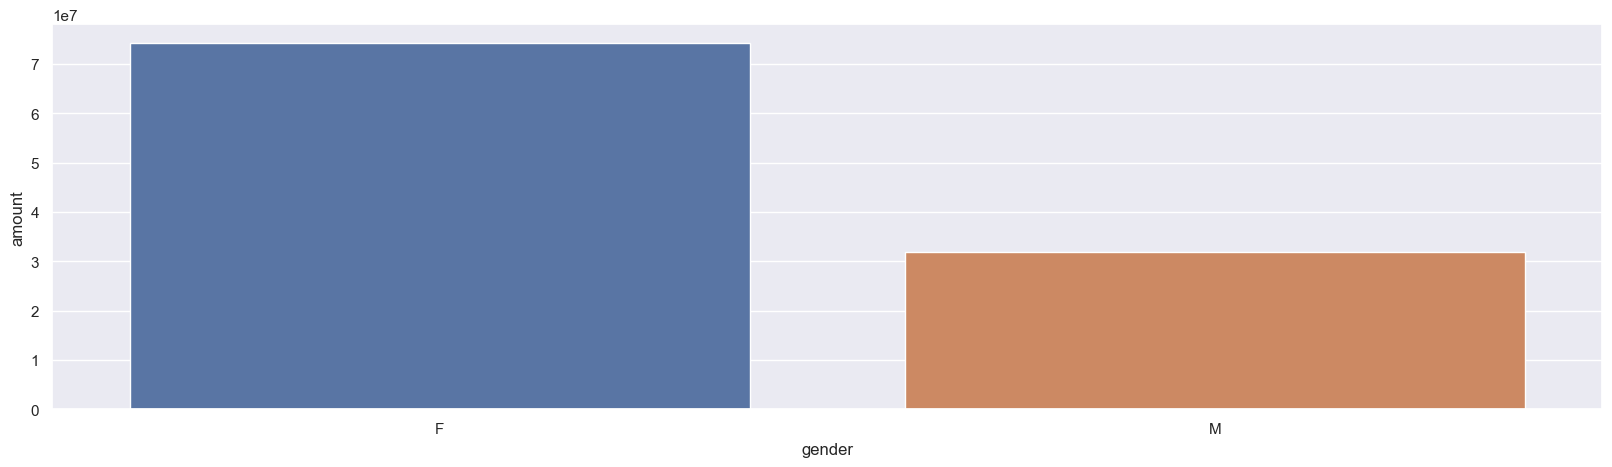

In [64]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(["gender"], as_index=False)["amount"].sum().sort_values(by="amount", ascending=False)

sns.barplot(x = "gender",y= "amount" ,data = sales_gen)

In [65]:
#From the above graph i can say that most of  the buyer are female even the purchasing power of female greater than male.

In [66]:
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


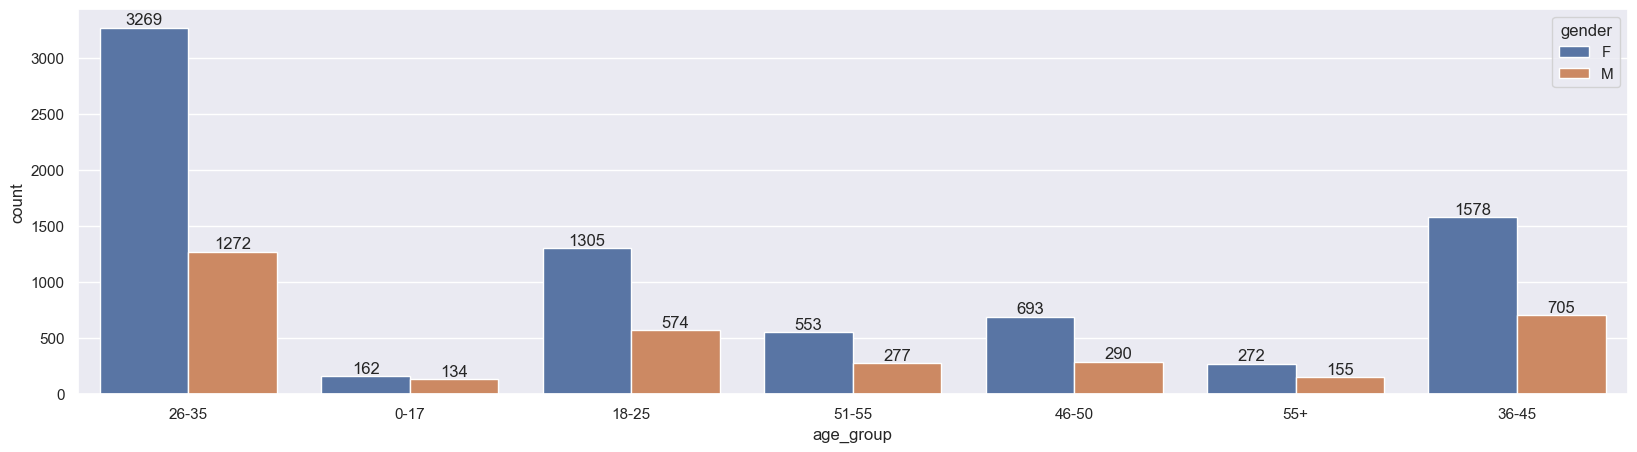

In [67]:
ax=sns.countplot(x="age_group",data=df,hue="gender")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='age_group', ylabel='amount'>

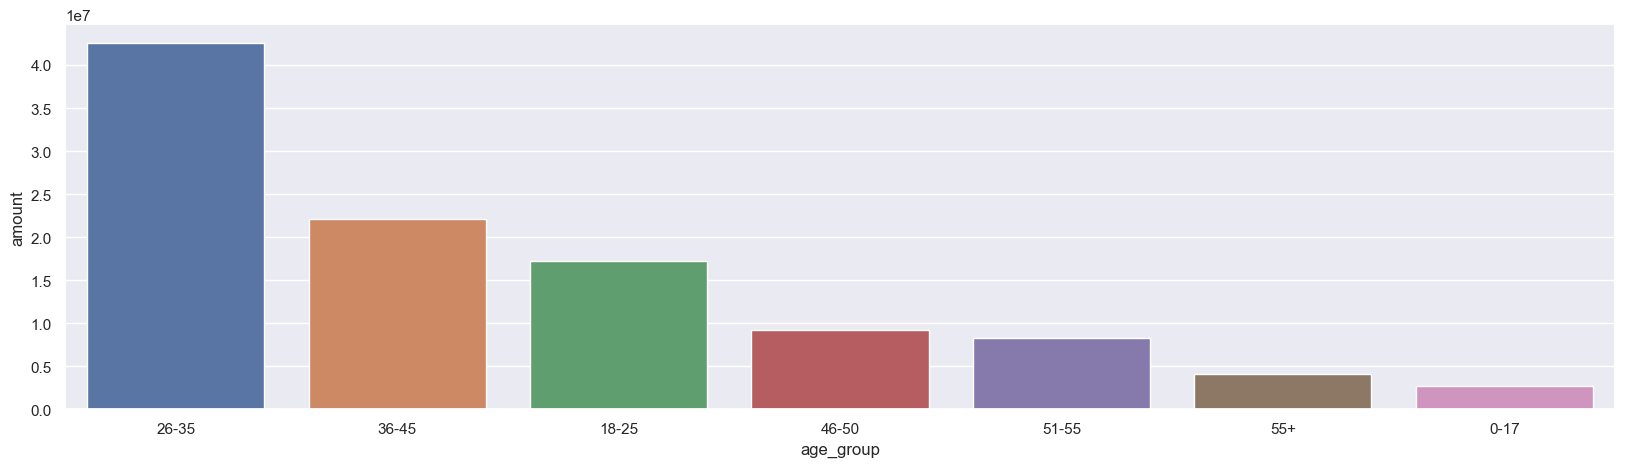

In [68]:
sale_age=df.groupby(["age_group"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False)
sns.barplot(x="age_group",y="amount",data=sale_age)

In [69]:
#Females age_group "26-35" spend huge amount on purchasing in comparison of others.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

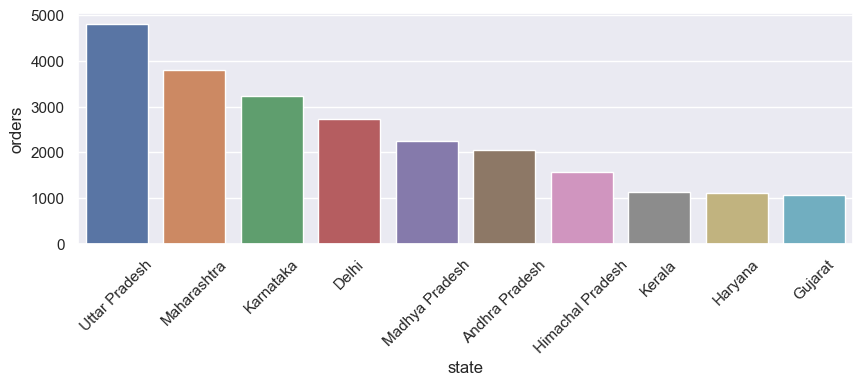

In [70]:
# total number of orders from top 10 states

sales_state = df.groupby(['state'], as_index=False)['orders'].sum().sort_values(by='orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(data = sales_state, x = 'state',y= 'orders')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

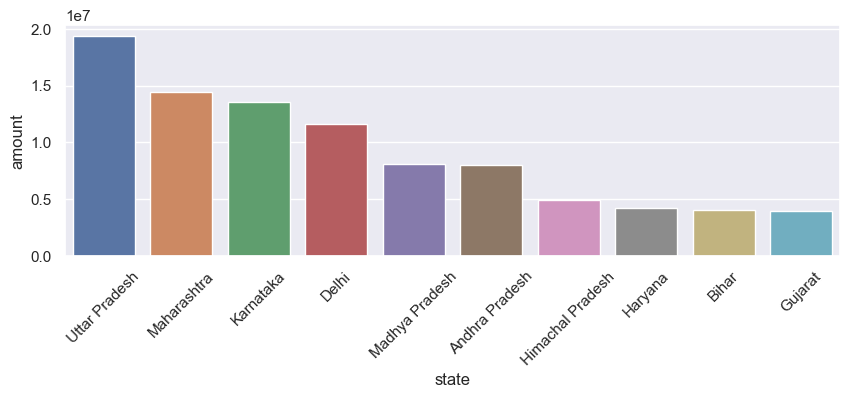

In [71]:
sales_amount = df.groupby(['state'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(data = sales_amount, x = 'state',y= 'amount')
plt.xticks(rotation=45)

In [72]:
#From the above graph we can say that mostly order and sales_amount are from Uttarpardesh,Maharashtra and karnataka.

In [73]:
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


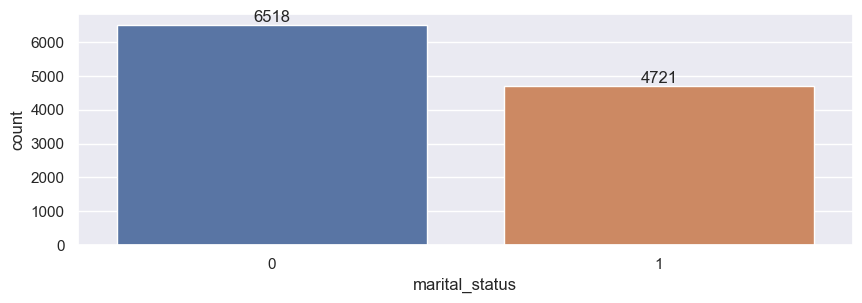

In [74]:
ax=sns.countplot(x="marital_status",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

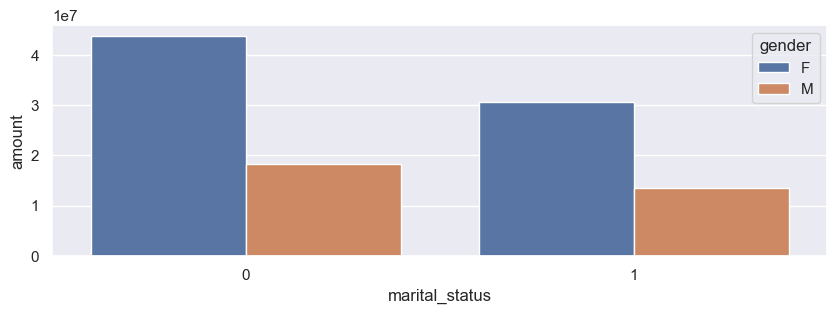

In [75]:
sales_married_status=df.groupby(["marital_status","gender"],as_index=False)["amount"].sum().sort_values(by="amount",ascending=False)
ax=sns.barplot(x="marital_status",y="amount",data=sales_married_status,hue="gender")

In [76]:
#From the above graph we can say that mostly buyer are married women
#and spending huge amount on purchasing in comparison of others.

In [77]:
#Occupations
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


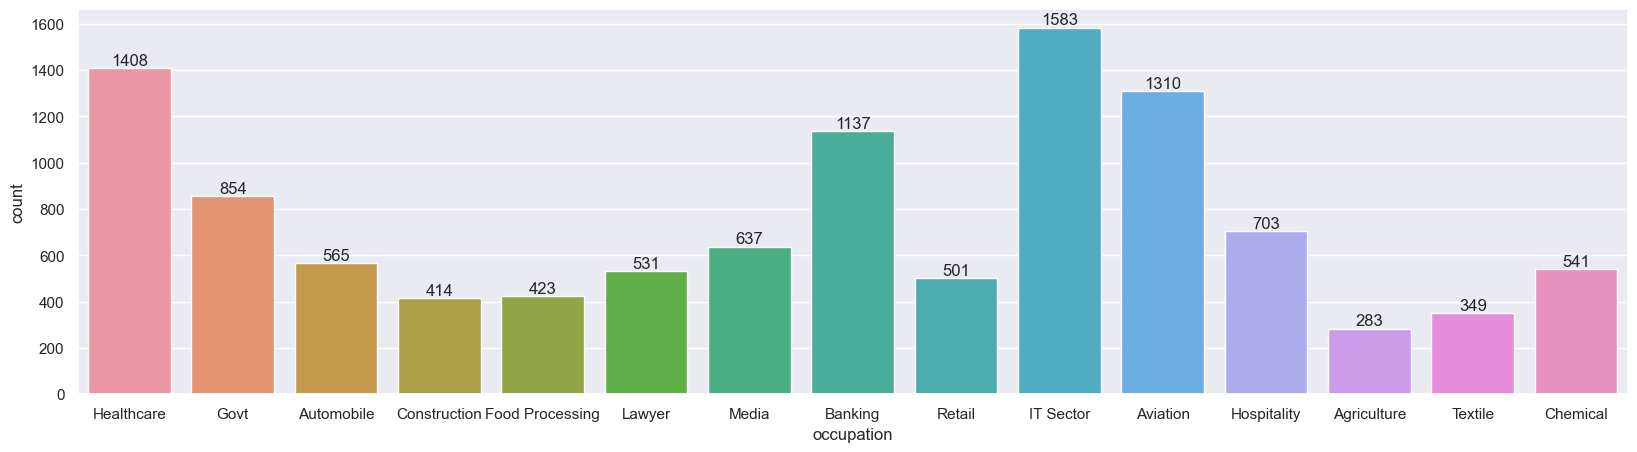

In [78]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='occupation', ylabel='amount'>

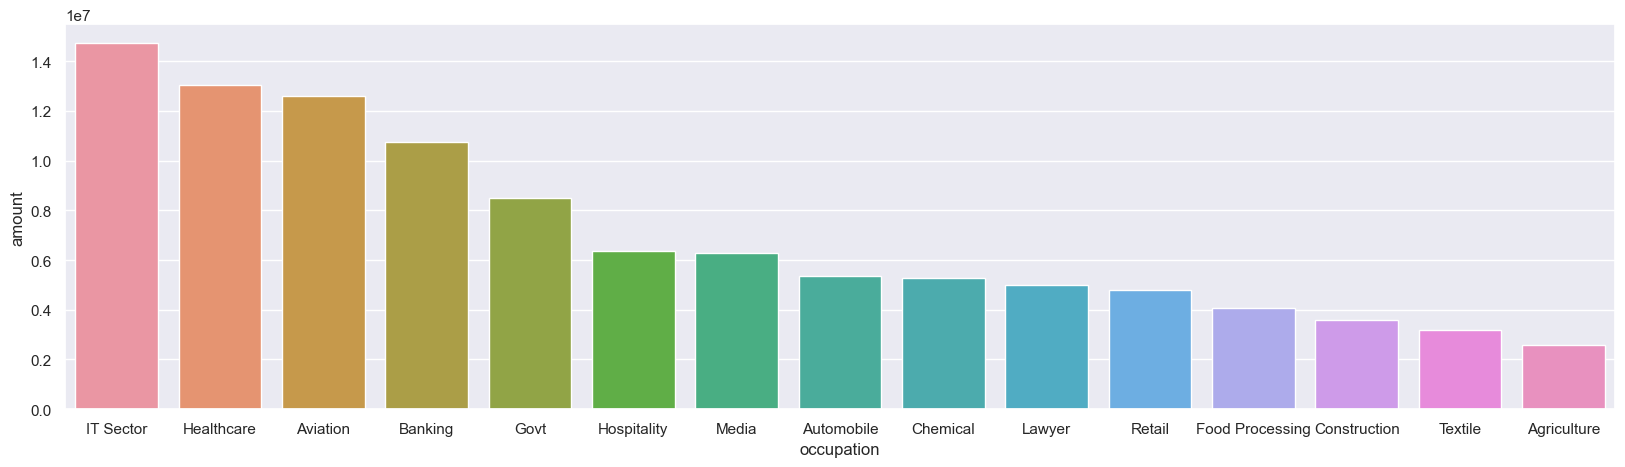

In [79]:
Occup_sal = df.groupby(['occupation'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = Occup_sal, x = 'occupation',y= 'amount')

In [80]:
#From the above graph we can say that most of buyers are working in IT-sector,Healthcare,Aviation.

In [81]:
#Product_category
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

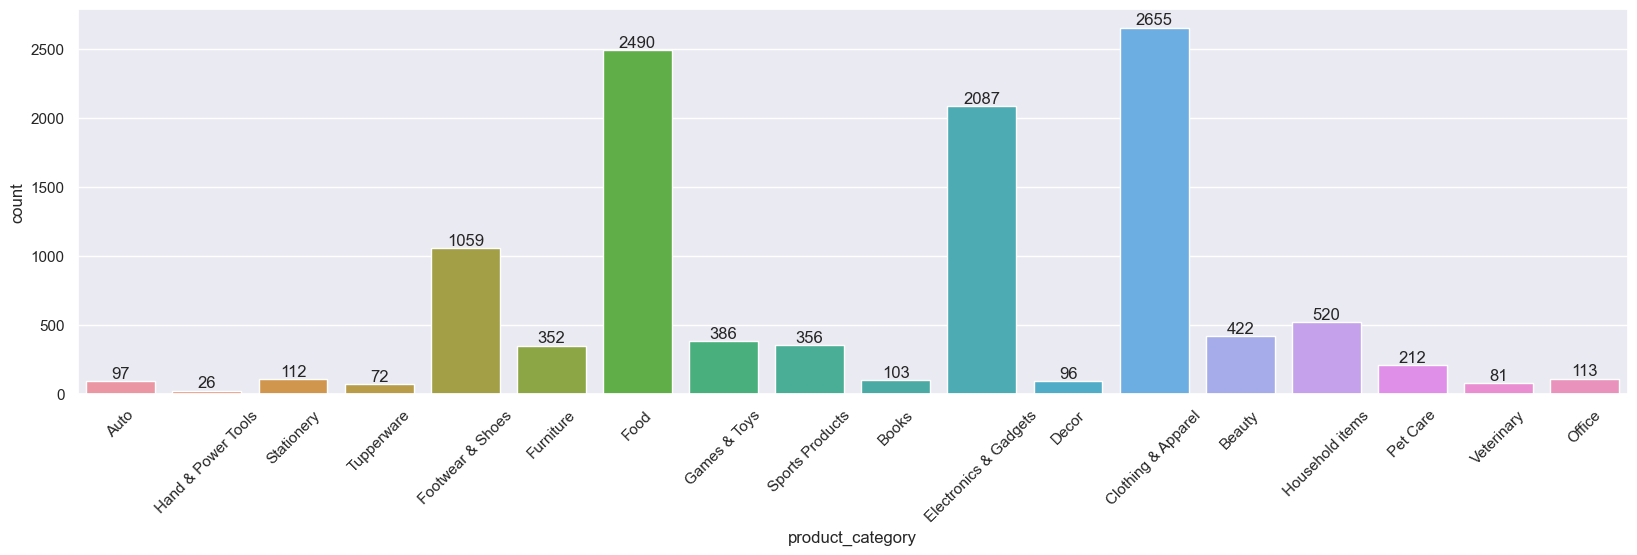

In [82]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'product_category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)

<Axes: xlabel='product_category', ylabel='amount'>

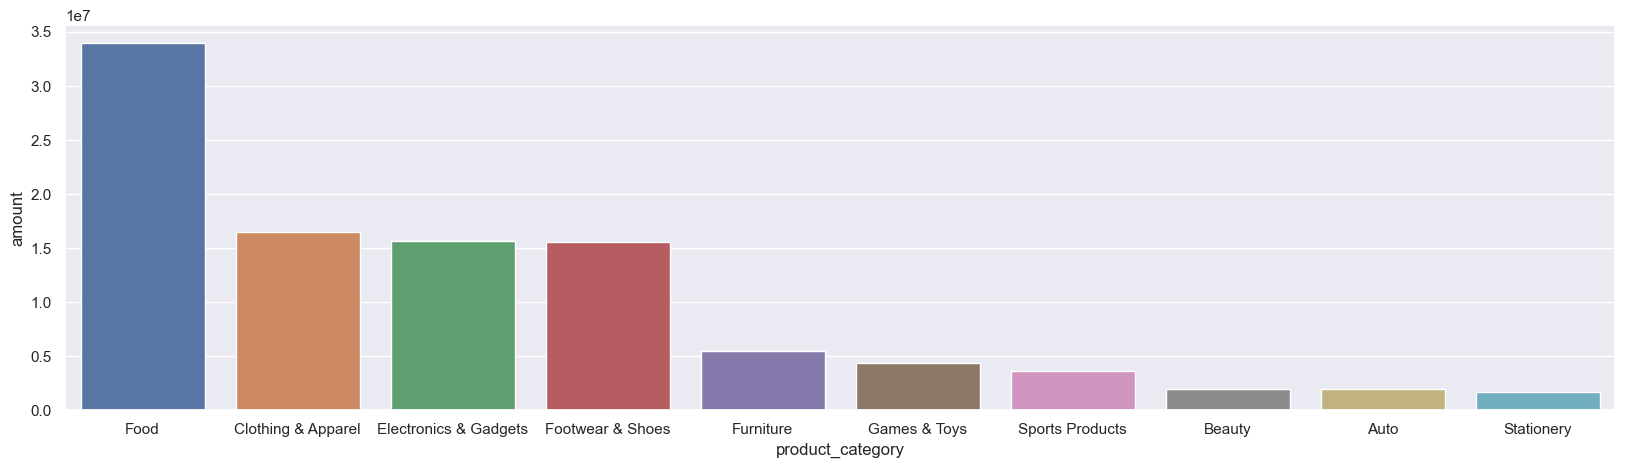

In [83]:
pro_amount = df.groupby(['product_category'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = pro_amount, x = 'product_category',y= 'amount')

In [84]:
#From the above graphs we can say that most of the sold product is Food,clothing&Apparel and Electronics&Gadgets

In [85]:
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


<Axes: xlabel='product_id', ylabel='orders'>

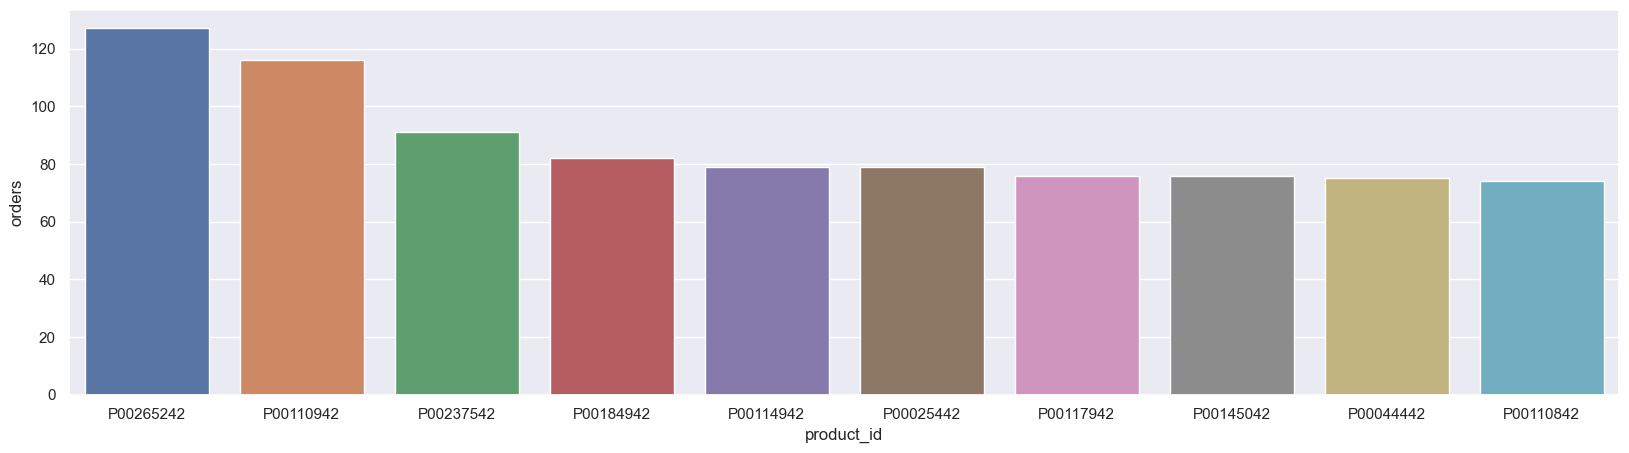

In [86]:
sales_state = df.groupby(["product_id"], as_index=False)["orders"].sum().sort_values(by="orders", ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = "product_id",y= "orders")

# Conclusion:-
Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare 
and Aviation are more likely to buy products from Food, Clothing and Electronics category*

In [87]:
df.head(2)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


In [93]:
#top 10 customer byy orders
top10=df.groupby(["cust_name"],as_index=False)["orders"].sum().sort_values(by="orders",ascending=False).head(10).reset_index()

In [96]:
top10.drop("index",axis=1,inplace=True)

In [100]:
top10

,rank_by order,orders
0,Vishakha,106
1,Shreyshi,75
2,Alejandro,73
3,Sudevi,71
4,Akshat,69
5,Akash,64
6,Stuti,63
7,Aastha,62
8,Sanjay,61
9,Fritzler,60


,rank_by order,orders
0,Vishakha,106
1,Shreyshi,75
2,Alejandro,73
3,Sudevi,71
4,Akshat,69
5,Akash,64
6,Stuti,63
7,Aastha,62
8,Sanjay,61
9,Fritzler,60
